In [13]:
import bs4
import undetected_chromedriver as uc
import pandas as pd
import re
import logging

In [14]:
from datafetcher.rankingfetcher import RankingScraper

In [15]:
from datafetcher.data.rankings.all_rankings import dates
rs = RankingScraper(dates[:300])

could not detect version_main.therefore, we are assuming it is chrome 108 or higher


In [16]:
df = rs.create_dataframe(save=True)

File datafetcher/data/rankings/data_atp_rankings_2025-06-23.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-06-16.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-06-09.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-05-26.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-05-19.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-05-05.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-04-21.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-04-14.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-04-07.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2025-03-31.csv already exists. Skipping save.
File datafetcher/data/rankings/data_atp_rankings_2

In [4]:
[file for file in files if file.startswith('data')]

['data_atp_rankings_2023-01-09.csv',
 'data_atp_rankings_2023-01-16.csv',
 'data_atp_rankings_2023-01-30.csv',
 'data_atp_rankings_2023-02-06.csv',
 'data_atp_rankings_2023-02-13.csv',
 'data_atp_rankings_2023-02-20.csv',
 'data_atp_rankings_2023-02-27.csv',
 'data_atp_rankings_2023-03-06.csv',
 'data_atp_rankings_2023-03-20.csv',
 'data_atp_rankings_2023-04-03.csv',
 'data_atp_rankings_2023-04-10.csv',
 'data_atp_rankings_2023-04-17.csv',
 'data_atp_rankings_2023-04-24.csv',
 'data_atp_rankings_2023-05-08.csv',
 'data_atp_rankings_2023-05-22.csv',
 'data_atp_rankings_2023-05-29.csv',
 'data_atp_rankings_2023-06-12.csv',
 'data_atp_rankings_2023-06-19.csv',
 'data_atp_rankings_2023-06-26.csv',
 'data_atp_rankings_2023-07-03.csv',
 'data_atp_rankings_2023-07-17.csv',
 'data_atp_rankings_2023-07-24.csv',
 'data_atp_rankings_2023-07-31.csv',
 'data_atp_rankings_2023-08-07.csv',
 'data_atp_rankings_2023-08-14.csv',
 'data_atp_rankings_2023-08-21.csv',
 'data_atp_rankings_2023-08-28.csv',
 

In [17]:

csv_files = [file for file in files if file.startswith('data')]
dfs = [pd.read_csv(os.path.join(folder, f)) for f in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)


In [18]:
combined_df[combined_df['lastName'] == 'C. Alcaraz']

,lastName,rank,rankingDate
0,C. Alcaraz,1,2023-01-09
1988,C. Alcaraz,1,2023-01-16
3974,C. Alcaraz,2,2023-01-30
5956,C. Alcaraz,2,2023-02-06
7950,C. Alcaraz,2,2023-02-13
...,...,...,...
207813,C. Alcaraz,2,2025-05-19
209944,C. Alcaraz,2,2025-05-26
212078,C. Alcaraz,2,2025-06-09
214228,C. Alcaraz,2,2025-06-16


C:\Users\davev\AppData\Local\Temp\ipykernel_34024\3949192438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcaraz_df['rankingDate'] = pd.to_datetime(alcaraz_df['rankingDate'])


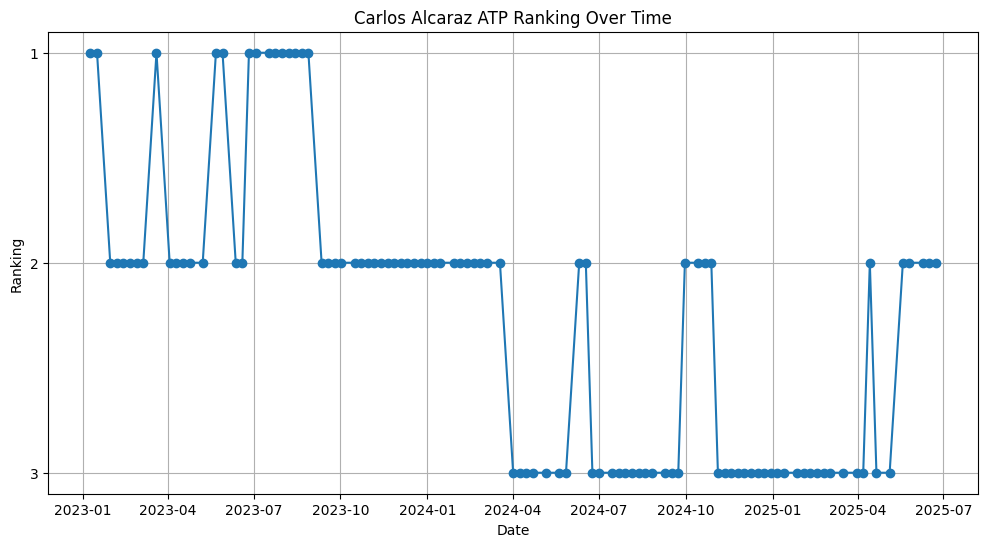

In [19]:
import matplotlib.pyplot as plt

# Filter for Alcaraz
alcaraz_df = combined_df[combined_df['lastName'] == 'C. Alcaraz']

# Make sure the date column is datetime and sort
alcaraz_df['rankingDate'] = pd.to_datetime(alcaraz_df['rankingDate'])
alcaraz_df = alcaraz_df.sort_values('rankingDate')

# Plot ranking over time (lower rank is better, so invert y-axis)
plt.figure(figsize=(12, 6))
plt.plot(alcaraz_df['rankingDate'], alcaraz_df['rank'], marker='o')
plt.gca().invert_yaxis()
plt.title("Carlos Alcaraz ATP Ranking Over Time")
plt.xlabel("Date")
plt.ylabel("Ranking")
plt.grid(True)
plt.show()